## TechCore Easy

## CLassification - KNN

## Python Implementation

In [1]:
# Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
# Read DataSet

dataset = pd.read_excel('Plant_Tree_data.xlsx')

In [3]:
dataset.head(10)

,LeafLength,LeafBreadth,ErrorLeafLength,ErrorLeafBreadth,LeafCurveAngle,EdgeCurvatureAngle,ErrorLeafCurvature,TreeLength,TreeType
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [4]:
print(dataset['TreeType'].unique())

[0 1]


In [5]:
# Seperate Features and Targets

X = dataset.drop(['TreeType'],  axis=1).values

y = dataset['TreeType'].values

In [6]:
# Split the Feature and Target in traning and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [7]:
# Create knn classifier object

knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [8]:
# Train the classifier

knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
# Test the trained model with the test data

y_pred = knn_classifier.predict(X_test)

In [10]:
# Print confusion matrix

print(confusion_matrix(y_test, y_pred))

[[4821   41]
 [ 121  387]]


In [11]:
# Print classification_report matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4862
           1       0.90      0.76      0.83       508

   micro avg       0.97      0.97      0.97      5370
   macro avg       0.94      0.88      0.91      5370
weighted avg       0.97      0.97      0.97      5370



In [12]:
## Elbow method

error = []

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    

Text(0, 0.5, 'Mean Error')

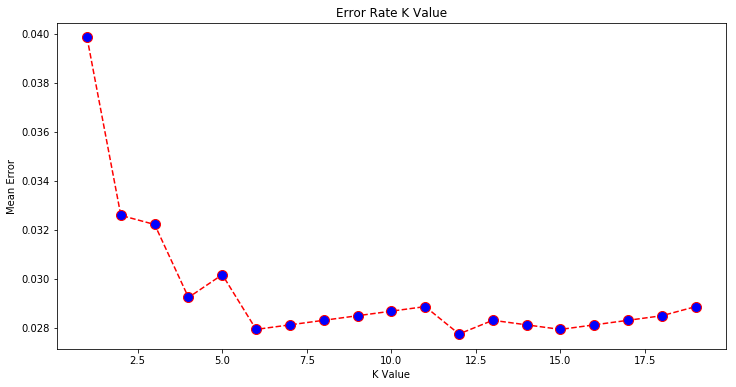

In [13]:
# Visuals for Elbow method

import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))

plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')